# A class similar to ROOT's TLorentzVector class. 

## Allows for doing particle physics calculations easily. 

In [2]:
import sys
sys.path.append('/Users/Jake/anaconda3/lib/python3.7/site-packages')

import numpy as np

In [24]:
class Particle():
    """
    FIXME: Not sure whether methods should call on other methods or on attributes, or both.
        Reason for the issue: What if a particle has its p_tot defined outside of the particle
        instantiation? Then the px, py, pz components won't necessarily agree with p_tot. 
        DISCREPANCY!
        
    My intuition says that all methods should call other methods. 
        This makes it seem like everything will stay interally consistent.
    However, if an attribute is externally changed, then there needs to be some 
        interal consistency checks.
    """
    
    def __init__(self,m=0,px=0,py=0,pz=0):
        """
        Create a particle from its mass and 3-momentum.
        
        Arguments:
            m = mass [GeV] 
            px = x-component of 3-momentum [GeV] 
            py = y-component of 3-momentum [GeV]
            pz = z-component of 3-momentum [GeV]
        """
        self.m  = m
        self.px = px
        self.py = py
        self.pz = pz
        
        self.vals = np.array([m,px,py,pz])
        self.Pcomps = self.vals[1::]
        
#         self.p_tot = self.Pmag()
#         self.E_tot = self.E()
#         self.beta = self.beta()

    def Pmag(self):
        """Get the magnitude of the total 3-momentum based on px, py, pz."""
        return np.sqrt(sum(self.Pcomps**2))
    
    def E(self):
        """Get the total energy."""
        return np.sqrt(self.m**2 + self.p_tot**2)
    
    def beta(self):
        """
        Get the total velocity of the particle as a fraction of c.
        Equivalently, the beta value."""
        return self.Pmag / self.E_tot
    
    def P3dot(self,other):
        """Take the scalar (dot) product of a Particle's 3-momentum 
        with another Particle's 3-momenum.
        """
        return sum(self.Pcomps * other.Pcomps)
    
    def P4dot(self,other):
        """Take the scalar (dot) product of a Particle's 4-momentum 
        with another Particle's 4-momenum.
        
        NOTE: 4-momentum has the form: (E,px,py,pz)
        """
        return self.E() * other.E() - self.P3dot(other)
    
    def M(self,*other):
        """Calculate invariant mass of a Particle.
        
        If NO argument is given, gets the inv. mass of the Particle.
        If one argument is given, gets the sqrt(s) of the two Particles.
        """
        if len(other) == 0: 
            return self.m
        
        else:
            for part in other:
                crossterm = 2*self.P4dot(part)
                return np.sqrt( self.m**2 + part.m**2 + crossterm )
    
    def __add__(self, other):
        """Add two Particle objects together to make a new Particle.
           Useful for decays 

        NOTE: The 3-momentum components add, but the inv. mass must be calculated differently.
        """
        P = self.Pcomps + other.Pcomps
        return Particle(self.M(other),P[0],P[1],P[2])
    
    def check_internal_consistency(self):
        """
        This method checks to make sure that if an attribute was externally modified, 
        for example: kaon.p_tot = 100 GeV, 
        that the other internal attributes stay consistent. 
        So in the previous example, the E_tot and momentum components would need to be changed. 
        """
        if self.P3dot(self) != self.p_tot**2:
            print("Warning! Momentum components don't vectorially sum to give p_tot!")
            

# Problem 2

In [3]:
# Initialize Particles.
pion   = Particle(0.140,-0.255,-0.050,0.486)
proton = Particle(0.938,-0.488,-0.018,2.109)
X = pion + proton

In [4]:
print("pion values:",pion.vals)
print("proton values:",proton.vals)
print("X values:",X.vals,"\n")
print("X mass:",X.m)
print("X energy:",X.E())

pion values: [ 0.14  -0.255 -0.05   0.486]
proton values: [ 0.938 -0.488 -0.018  2.109]
X values: [ 1.13218789 -0.743      -0.068       2.595     ] 

X mass: 1.1321878919996906
X energy: 2.9278912928574896


In [5]:
# Check that the 3-dim and 4-dim scalar products are symmetric.
print(proton.P3dot(pion))
print(pion.P3dot(proton),"\n")
print(proton.P4dot(pion))
print(pion.P4dot(proton))

1.150314
1.150314 

0.1912027113953516
0.1912027113953516


# Problem 3

In [6]:
# Initialize Particles.
photon    = Particle(0,10,10,10)
proton_i  = Particle(0.938,-10,-10,-10)
pionminus = Particle(135,0,0,0)
proton_f  = Particle(0.938,0,0,0)

In [7]:
Egamma = (pionminus.m + 2*proton_i.m)/(2 + 2*proton_i.m/pionminus.m)
Egamma

67.96576380408716

In [8]:
photon    = Particle(0,Egamma,0,0)
proton_i  = Particle(0.938,-Egamma,0,0)
pionminus = Particle(135,0,0,0)
proton_f  = Particle(0.938,0,0,0)

In [9]:
# Calculate sqrt(s) at these Feynman diagram vertices:
print(photon.M(proton_i))  # first vertex
print(pionminus.M(proton_f))  # second vertex
true_sqrt_s = pionminus.M(proton_f)

135.93800000000002
135.938


# A Neat Graphical Proof for Problem 3:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Scan over a range of photon momenta. 
momenta = np.arange(30,100,1,dtype=float)

sqrt_s_photon_list = []
sqrt_s_pion_list = []
for m in momenta:
    photon    = Particle(0,m,0,0)
    proton_i  = Particle(0.938,-m,0,0)
    pionminus = Particle(135,0,0,0)
    proton_f  = Particle(0.938,0,0,0)
    sqrt_s_photon_list.append( photon.M(proton_i) )
    sqrt_s_pion_list.append( pionminus.M(proton_f) )

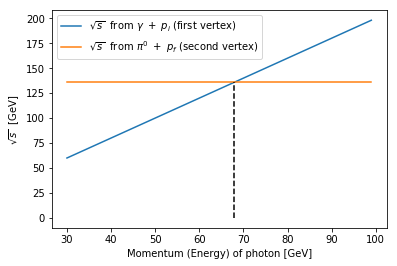

In [13]:
fig,ax = plt.subplots()

ax.set_xlabel(r'Momentum (Energy) of photon [GeV]')
ax.set_ylabel(r'$\sqrt{s}$  [GeV]')

ax.plot(momenta,sqrt_s_photon_list, label=r'$\sqrt{s}$  from $\gamma\ +\ p_{i}$ (first vertex)')
ax.plot(momenta,sqrt_s_pion_list, label=r'$\sqrt{s}$  from $\pi^{0}\ +\ p_{f}$ (second vertex)')

# Add a line to easily see the intersection.
ax.plot([Egamma,Egamma],[0,true_sqrt_s],ls='dashed',c='k')

ax.legend()

## For Prof. Darin Acosta's HW01 (the one due: 2019-09-04)

In [22]:
m_kaon = 0.494  # GeV
p_kaon = 1  # GeV

kaon = Particle(m_kaon)

kaon.p_tot = p_kaon

kaon.E()

1.115363617839492

In [16]:
np.sqrt(m_kaon**2 + 1**2)

1.115363617839492

In [18]:
kaon.p_tot / kaon.E()

0.8965686023873037

In [23]:
(0.893 - 0.897) / 0.897 

-0.004459308807134898

In [25]:
1.115/0.494

2.257085020242915

In [27]:
1/0.494 * 1.24E-8 *299792458

7.525154816194332

In [28]:
1/.494

2.0242914979757085